# QA4MBES functionality 2: grid coverage testing


In [1]:
from shapely.geometry import shape
import json

In [2]:
## awkward hack to import local modules in Jupyter
import sys
sys.executable
sys.path.append('/mnt/bigdata/frontierSI/qa4mbes-data-pipeline/qa4mbes')

In [3]:
import testcoverage
import getpointcoverage

## 1. Check geotiff grid coverage of a planned area

Does my geotiff raster cover any of the planned survey region? if so how much? if not roughly how far away were we?

### The positive case - we surveyed some of the planned region
In this case, a polygon is returned showing the intersection of the planned and surveyed areas

In [24]:
%%time

coveragestats = testcoverage.testcoverage('/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m-crs.tiff',
                                          '../tests/gridcoverages/partial-smalltest.shp')

CPU times: user 34.6 s, sys: 332 ms, total: 34.9 s
Wall time: 34.9 s


In [25]:
coveragestats

{'teststart': '2019-03-03T20:32:28.922283',
 'teststop': '2019-03-03T20:33:03.831060',
 'plannedcoverage': '../tests/gridcoverages/partial-smalltest.shp',
 'testswath': '/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m-crs.tiff',
 'percentcovered': 0.6616201449420682,
 'areacovered': 6562867.478803044,
 'centroiddistance': 1480.6176657355902,
 'minimumdistance': 0.0,
 'intersection': '{"type": "MultiPolygon", "coordinates": [[[[147.22659965993296, -39.256479671619914], [147.22660757994976, -39.25655174377257], [147.22659831322574, -39.25655176180308], [147.2265983712386, -39.256569783580765], [147.22658678091028, -39.256569806131225], [147.22658680991526, -39.256578817020056], [147.22659840024505, -39.25657879446959], [147.22659845825802, -39.256596816247196], [147.22658686792525, -39.256596838797684], [147.22658689693026, -39.25660584968646], [147.22657530659598, -39.2566058722358], [147.2265753646031, -39.25662389401335], [147.2265637742658, -39.256623916561544], [147.2265638032679

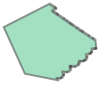

In [26]:
shape(json.loads(coveragestats["intersection"]))

### The planned region is fully covered by the survey
In this case the returned intersection is the planning polygon

In [7]:
%%time

totalcoveragestats = testcoverage.testcoverage('/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m-crs.tiff',
                                               '../tests/gridcoverages/geotiff-test-allcovered.shp')

CPU times: user 35.3 s, sys: 409 ms, total: 35.7 s
Wall time: 35.7 s


In [8]:
totalcoveragestats

{'teststart': '2019-03-03T20:27:26.351675',
 'teststop': '2019-03-03T20:28:02.051140',
 'plannedcoverage': '../tests/gridcoverages/geotiff-test-allcovered.shp',
 'testswath': '/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m-crs.tiff',
 'percentcovered': 1.0,
 'areacovered': 3738311.952390468,
 'centroiddistance': 30.61181462565325,
 'minimumdistance': 0.0,
 'intersection': '{"type": "Polygon", "coordinates": [[[147.19636702128994, -39.24407285271974], [147.20713005294388, -39.250033916404995], [147.19802287231363, -39.27089763930338], [147.18957803209287, -39.271559979712855], [147.18245787269103, -39.25996902254708], [147.19636702128994, -39.24407285271974]]]}'}

Area covered is reported as 1.0, because the intersection of the planning polygon and the survey polygon is the planning polygon

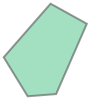

In [9]:
shape(json.loads(totalcoveragestats["intersection"]))

### Our survey is fully contained within the planned region
The returned intersection is the survey coverage

In [10]:
%%time

subregioncoveragestats = testcoverage.testcoverage('/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m-crs.tiff',
                                               '../tests/gridcoverages/survey-enclosed.shp')

CPU times: user 35.2 s, sys: 316 ms, total: 35.6 s
Wall time: 35.5 s


In [11]:
subregioncoveragestats

{'teststart': '2019-03-03T20:28:02.099763',
 'teststop': '2019-03-03T20:28:37.639102',
 'plannedcoverage': '../tests/gridcoverages/survey-enclosed.shp',
 'testswath': '/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m-crs.tiff',
 'percentcovered': 0.39426114510275934,
 'areacovered': 17465007.999999493,
 'centroiddistance': 734.8506652585957,
 'minimumdistance': 0.0,
 'intersection': '{"type": "MultiPolygon", "coordinates": [[[[147.22813413518367, -39.25836897409096], [147.22816890705366, -39.25836890597154], [147.2281689654724, -39.25838692774164], [147.22813419359352, -39.25838699586109], [147.22813413518367, -39.25836897409096]]], [[[147.22807492658683, -39.25798161952735], [147.22810969826557, -39.257981551426184], [147.22810972746694, -39.25799056231185], [147.2280981369059, -39.25799058501341], [147.22809816610584, -39.25799959589909], [147.2280749849807, -39.25799964129875], [147.22807492658683, -39.25798161952735]]], [[[147.22787613679296, -39.25744135206229], [147.22789931773

When the survey fits wholly inside the planned region, the intersection is the survey coverage - but the reported percentage is correct

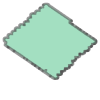

In [12]:
shape(json.loads(subregioncoveragestats["intersection"]))

### The null case - we didn't survey any of the planned region

No intersection polygon is returned

In [13]:
%%time

nullstats = testcoverage.testcoverage('/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m-crs.tiff',
                                      '../tests/gridcoverages/nulltest.shp')

CPU times: user 34.4 s, sys: 320 ms, total: 34.7 s
Wall time: 34.7 s


In [14]:
nullstats

{'teststart': '2019-03-03T20:28:38.147734',
 'teststop': '2019-03-03T20:29:12.885634',
 'plannedcoverage': '../tests/gridcoverages/nulltest.shp',
 'testswath': '/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m-crs.tiff',
 'percentcovered': None,
 'areacovered': None,
 'centroiddistance': 306273.93753704586,
 'minimumdistance': 303078.3241598553,
 'intersection': None}

### Another null case: our tiff has no CRS

In [15]:
%%time

notiffcrs = testcoverage.testcoverage('/mnt/bigdata/frontierSI/sampledata/raster/grid0_1m.tif',
                                      '../tests/gridcoverages/nulltest.shp')

CPU times: user 4.25 ms, sys: 5 µs, total: 4.26 ms
Wall time: 3.79 ms


In [16]:
notiffcrs

'{"QAfailed": "No CRS present", "filename": "/mnt/bigdata/frontierSI/sampledata/raster/grid0_1m.tif"}'

### Final null case: our .shp has no CRS

In [17]:
noshpcrs = testcoverage.testcoverage('/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m.tiff',
                                      '../tests/gridcoverages/5km_box_actual.shp')

In [18]:
noshpcrs

'{"QAfailed": "No CRS present", "filename": "../tests/gridcoverages/5km_box_actual.shp"}'

## 2. Check BAG coverage of a planned area

Does my bathymetry attributed grid cover any of the planned survey region? if so how much? if not roughly how far away were we?

In [28]:
%%time

bagcoverage = testcoverage.testcoverage('../../bag-samples/grid1_ellipsoid_1m.bag',
                                          '../tests/gridcoverages/partial-smalltest.shp')

CPU times: user 34.7 s, sys: 300 ms, total: 35 s
Wall time: 35 s


In [29]:
bagcoverage

{'teststart': '2019-03-03T20:57:57.431939',
 'teststop': '2019-03-03T20:58:32.463402',
 'plannedcoverage': '../tests/gridcoverages/partial-smalltest.shp',
 'testswath': '../../bag-samples/grid1_ellipsoid_1m.bag',
 'percentcovered': 0.6736964400650368,
 'areacovered': 6682656.9458149625,
 'centroiddistance': 1469.399575958519,
 'minimumdistance': 0.0,
 'intersection': '{"type": "MultiPolygon", "coordinates": [[[[147.22659814885716, -39.25646592083019], [147.2266090405429, -39.256565035170354], [147.22659746356496, -39.256565057695894], [147.22659749257573, -39.256574069960436], [147.22660908468788, -39.25657404740544], [147.22660914271242, -39.25659207193447], [147.2265975505973, -39.256592094489484], [147.2265975796081, -39.256601106753976], [147.2265859874915, -39.25660112930784], [147.22658604551017, -39.25661915383681], [147.22657445339058, -39.256619176389535], [147.22657448239846, -39.256628188654005], [147.22658607451953, -39.256628166101265], [147.2265861615477, -39.256655202894

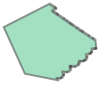

In [30]:
shape(json.loads(coveragestats["intersection"]))

In [31]:
%%time

bagnullcoverage = testcoverage.testcoverage('../../bag-samples/grid1_ellipsoid_1m.bag',
                                          '../tests/gridcoverages/testcoverage.geojson')

CPU times: user 33.6 s, sys: 176 ms, total: 33.8 s
Wall time: 33.8 s


In [32]:
bagnullcoverage

{'teststart': '2019-03-03T20:58:32.642507',
 'teststop': '2019-03-03T20:59:06.442963',
 'plannedcoverage': '../tests/gridcoverages/testcoverage.geojson',
 'testswath': '../../bag-samples/grid1_ellipsoid_1m.bag',
 'percentcovered': None,
 'areacovered': None,
 'centroiddistance': 306454.38046609436,
 'minimumdistance': 303269.45634502696,
 'intersection': None}

### Interpreting results

`testcoverage` returns a python dictionary containing:

- time of test start
- time of test stop
- path to the 'planned' coverage
- path to the survey swathe being tested
- % of planned coverage overlapped by the swath
- area (in metres) of the planned coverage overlapped by the swath
- distance (in metres) between the centroids of the planned coverage and the swath coverage
- minimum distance (in metres) between the planned and survey coverages. This is a rough guide mainly used to see how far away the survey was in the case of no overlap with the planned region
- a GeoJSON polygon describing the intersection of planned coverage and survey coverage

Optionally, it could contain GeoJSON polygons describing the actual coverages used in the test.

**question:** should swath density metrics be included here?